# BUILDING A COLLABORATIVE RECOMMENDATION SYSTEM FOR MOVIELENS

# BUSINESS OVERVIEW: 

XMovies is a digital cinema company providing movies and tv shows on demand through their subscription platform. The company is seeking to develop a recommendation system based on user ratings that can enhance user satisfaction, engagement, and revenue generation for the platform. The system should leverage data science techniques to analyze user preferences and generate accurate and personalized recommendations, thereby increasing user retention, driving user interaction, and boosting overall platform usage.This will also grants a competitive advantage to other platforms offering the same services.

# PROBLEM STATEMENT

We are working for a leading video streaming platform that offers a vast collection of movies to its users. The company’s customers are struggling to discover new movies that align with their interests. This leads to decreased user satisfaction, lower engagement, and ultimately affects revenue generation for the platform. The current recommendation system fails to accurately analyze user preferences and provide personalized movie suggestions, resulting in an unsatisfactory user experience.

# PROJECT OBJECTIVE

* **Main Objective:**

The primary goal of the project is to build a movie recommendation system that provides top 5 movie recommendations to a user based on their ratings of other movies. 

* **Specific Objectives**

1. To enhance user satisfaction by providing accurate and personalized movie recommendations that align with each user's individual tastes and interests.
2. Improve user retention by delivering a highly engaging and satisfying user experience through personalized recommendations.

# 1. DATA EXPLORATION

 **DATA UNDERSTANDING** 

For this project we will use the MovieLens dataset (ml-latest-small)as provided by the GroupLens research lab at the University of Minnesota. The dataset describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

The dataset is divided into 4:

1. Movie dataset
2. Ratings dataset
3. Tags dataset
4. Links dataset

* Importing Libraries

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # setting ignore as a parameter and further adding category

# 1.2 LOAD AND EXPLORE DATA

Load and explore the movie dataset 

In [2]:
df_movies = pd.read_csv("Dataset/movies.csv")
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [4]:
#check dataset shape
df_movies.shape

(9742, 3)

In [5]:
#check for uniqueness
for data_mov in df_movies:
    print('For {},{} unique values present'.format(data_mov,df_movies[data_mov].nunique()))

For movieId,9742 unique values present
For title,9737 unique values present
For genres,951 unique values present


Load and explore the ratings dataset 

In [6]:
df_ratings = pd.read_csv("Dataset/ratings.csv")
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [8]:
#check dataset shape
df_ratings.shape

(100836, 4)

In [9]:
#check dataset uniqueness
for data_rat in df_ratings:
    print('For {},{} unique values present'.format(data_rat,df_ratings[data_rat].nunique()))

For userId,610 unique values present
For movieId,9724 unique values present
For rating,10 unique values present
For timestamp,85043 unique values present


In [10]:
#summary of ratings.csv
df_ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [11]:
#minimum rating given to a movie
df_ratings['rating'].min() 

0.5

In [12]:
#maximum rating given to a movie
df_ratings['rating'].max()

5.0

Load and explore the tags dataset 

In [13]:
df_tags = pd.read_csv("Dataset/tags.csv")
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [14]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [15]:
#check dataset shape
df_tags.shape

(3683, 4)

In [16]:
#check dataset uniqueness
for data_tag in df_tags:
    print('For {},{} unique values present'.format(data_tag,df_tags[data_tag].nunique()))

For userId,58 unique values present
For movieId,1572 unique values present
For tag,1589 unique values present
For timestamp,3411 unique values present


Load and explore the links dataset 

In [17]:
df_links = pd.read_csv("Dataset/links.csv")
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [18]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [19]:
#check dataset shape
df_links.shape

(9742, 3)

In [20]:
#check dataset links
for data_lin in df_links:
    print('For {},{} unique values present'.format(data_lin,df_links[data_lin].nunique()))

For movieId,9742 unique values present
For imdbId,9742 unique values present
For tmdbId,9733 unique values present


# 1.3 Choosing Dataset

The project aims at building a recommendation system based on movie ratings, with these we will merge df_movies and df_ratings

In [21]:
# Merge the dataframes
df2 = pd.merge(df_movies, df_ratings, on='movieId')

# Print the information of the merged dataframe
print("Merged Dataframe Info:")
df2.info()

Merged Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [22]:
#Review merged dataframe
df2.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [23]:
# Check for missing values in the MovieLens dataset
df2.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

# 2. DATA ANALYSIS

Analysis movie preference over the years. 

To understand userid movie preference produced over the years, we will start by extracting the year from the title.

In [24]:
# Extract the year from 'title' column
df2['year'] = df2['title'].str.extract(r'\((\d{4})\)')
df2['title'] = df2['title'].str.replace(r'\s*\(\d{4}\)', '')

# Print the updated DataFrame
df2.head()

,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1995


For general understanding, we will analyse the top 10 most produced genres over the years

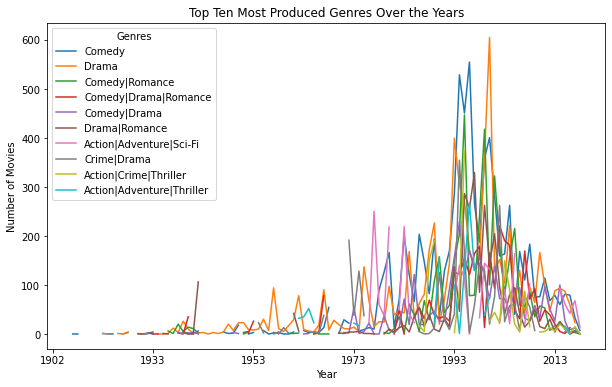

In [25]:
# Group by year and genre, and count the number of movies
genre_counts = df2.groupby(['year', 'genres']).size().unstack()

# Get the top ten most produced genres
top_genres = genre_counts.sum().nlargest(10).index

# Filter the genre counts for the top ten genres
top_genre_counts = genre_counts[top_genres]

# Plot the top ten most produced genres over the years
top_genre_counts.plot(kind='line', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Top Ten Most Produced Genres Over the Years')
plt.legend(title='Genres')
plt.show()

Analyse the top 10 most rated movie genres over the years 

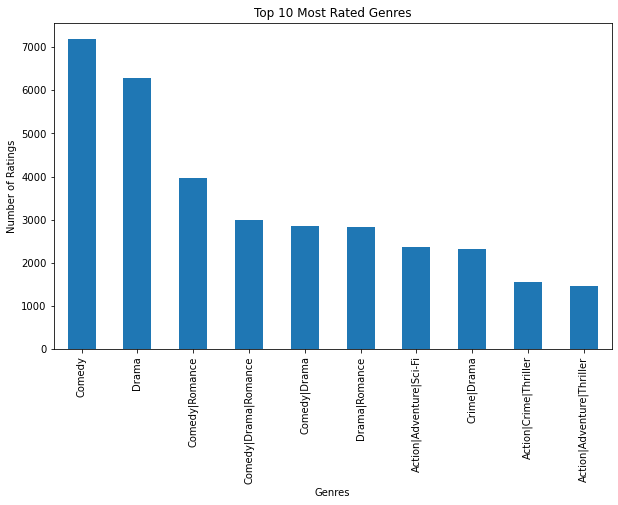

In [26]:
# Calculate the total number of ratings for each genre
genre_ratings = df2.groupby('genres')['rating'].count()

# Get the top 10 most rated genres
top_rated_genres = genre_ratings.nlargest(10)

# Plot the top 10 most rated genres
plt.figure(figsize=(10, 6))
top_rated_genres.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Number of Ratings')
plt.title('Top 10 Most Rated Genres')
plt.show()

Analyse the number of titles rated by each userid

In [47]:
# Count the number of rated titles for each user ID
titles_per_user = df2.groupby('userId')['title'].nunique()

# Print the number of rated titles for each user ID
print(titles_per_user)

userId
1       229
2        29
3        39
4       216
5        44
       ... 
606    1105
607     187
608     825
609      37
610    1298
Name: title, Length: 610, dtype: int64


View top 10 users who rated the most titles

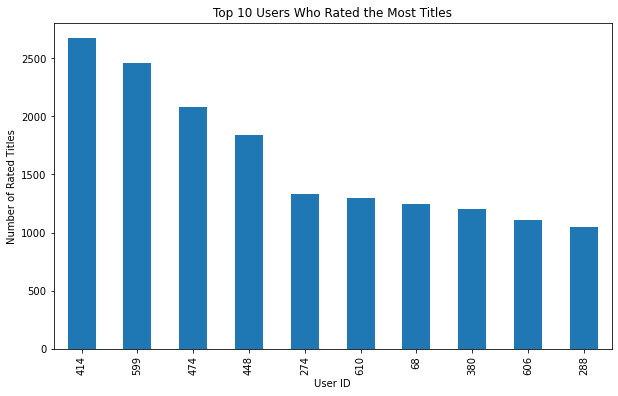

In [48]:
# Count the number of rated titles for each user ID
titles_per_user = df2.groupby('userId')['title'].nunique()

# Get the top 10 users who rated the most titles
top_users = titles_per_user.nlargest(10)

# Plot the user IDs who rated the most titles
plt.figure(figsize=(10, 6))
top_users.plot(kind='bar')
plt.xlabel('User ID')
plt.ylabel('Number of Rated Titles')
plt.title('Top 10 Users Who Rated the Most Titles')
plt.show()

# 3. COLLABORATIVE FILTERING RECOMMENDATION SYSTEM 

In [39]:
# importing relevant libraries
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
import numpy as np

In [37]:
# Convert the DataFrame into a Surprise Dataset
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(df2[['userId', 'movieId', 'rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

In [38]:
dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of items: ', dataset.n_items)

Number of users:  610 

Number of items:  9724


Hypertunning Dataset to get the best parameters

In [42]:
## Perform a gridsearch with SVD
params = {'n_factors': [20, 50, 100],
         'reg_all': [0.02, 0.05, 0.1]}
g_s_svd = GridSearchCV(SVD,param_grid=params,n_jobs=-1)
g_s_svd.fit(data)

In [43]:
print(g_s_svd.best_score)
print(g_s_svd.best_params)

{'rmse': 0.8693804004379402, 'mae': 0.6684190070988877}
{'rmse': {'n_factors': 100, 'reg_all': 0.05}, 'mae': {'n_factors': 100, 'reg_all': 0.05}}


The result shows the best scores achieved by the SVD algorithm is RMSE OF 0.8693804004379402 and MAE of 0.6684190070988877. From the grid search we also observe that the best parameter combination for both RMSE and MAE is 'n_factors': 100, 'reg_all': 0.05

In [44]:
# cross validating with KNNBasic
knn_basic = KNNBasic(sim_options={'name':'pearson', 'user_based':True})
cv_knn_basic = cross_validate(knn_basic, data, n_jobs=-1)

In [45]:
# print out the average RMSE score for the test set
for i in cv_knn_basic.items():
    print(i)
print('-----------------------')
print(np.mean(cv_knn_basic['test_rmse']))

('test_rmse', array([0.9776384 , 0.97364323, 0.96994794, 0.96968817, 0.97413416]))
('test_mae', array([0.75447914, 0.75065675, 0.74897406, 0.74925668, 0.7540623 ]))
('fit_time', (1.4556915760040283, 1.4852793216705322, 1.5272865295410156, 1.5236599445343018, 1.5155739784240723))
('test_time', (2.3815970420837402, 2.407072067260742, 2.3815157413482666, 2.429853677749634, 2.3212687969207764))
-----------------------
0.9730103781790413


The results test_rmse shows RMSE for each fold of the cross-validation, test_mae shows the MAE for each fold of the cross-validation, the fit_time shows the time taken to fit(train) the algorithm on each fold of the cross-validation and lastly test_time shows time taken to test(predict) the algorithm on each fold of the cross validation.
0.9730103781790413 shows the average RMSE score across all the cross-validation.

In [46]:
# cross validating with KNNBaseline
knn_baseline = KNNBaseline(sim_options={'name':'pearson', 'user_based':True})
cv_knn_baseline = cross_validate(knn_baseline,data)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [47]:
# print out the average score for the test set
for i in cv_knn_baseline.items():
    print(i)

np.mean(cv_knn_baseline['test_rmse'])

('test_rmse', array([0.87777331, 0.8803434 , 0.87929725, 0.87172354, 0.87997493]))
('test_mae', array([0.67203223, 0.67060564, 0.67041751, 0.66508865, 0.67542818]))
('fit_time', (1.1380581855773926, 1.2103826999664307, 1.0464482307434082, 1.0141994953155518, 1.026155948638916))
('test_time', (1.9030404090881348, 1.9322185516357422, 1.723923921585083, 1.6718673706054688, 1.739037275314331))


0.8778224851795511

The results test_rmse shows RMSE for each fold of the cross-validation, test_mae shows the MAE for each fold of the cross-validation, the fit_time shows the time taken to fit(train) the algorithm on each fold of the cross-validation and lastly test_time shows time taken to test(predict) the algorithm on each fold of the cross validation.
0.8774070745386995 shows the average RMSE score across all the cross-validation.

Comparing the RMSE values between KNNBasic and KNNBaseline:

1. The KNNBaseline algorithm has a lower RMSE of 0.8774070745386995, which suggests that it has better prediction accuracy compared to KNNBasic.
2. The KNNBasic algorithm has a higher RMSE of 0.9730103781790413, indicating a slightly higher prediction error.

Based on the RMSE values provided, KNNBaseline appears to outperform KNNBasic in terms of prediction accuracy and recommendation quality.

## 3.1 MAKING PREDICTIONS

Use the best parameters observed during the grid search to make predictions

In [49]:
#instantiate SVD using best params and fit the dataset
svd = SVD(n_factors= 50, reg_all=0.05)
svd.fit(dataset)

Let's make a simple prediction

In [50]:
svd.predict(2, 4)

Prediction(uid=2, iid=4, r_ui=None, est=3.07918579169659, details={'was_impossible': False})

The SVD model predicts that user 2 would give a rating of approximately 3.08 for movieID 4. This shows that the model is working 

## 3.2 MAKING RECOMMENDATIONS

Create a function that provides an interactive way for a user to rate movies by randomly selecting movies from the dataframe and collecting their ratings.

In [51]:
def movie_rater(data,num, genre=None):
    userID = 1000
    rating_list = []
    while num > 0:
        if genre:
            movie = data[data['genres'].str.contains(genre)].sample(1)
        else:
            movie = data.sample(1)
        print(movie)
        rating = input('How do you rate this movie on a scale of 1-5, press n if you have not seen :\n')
        if rating == 'n':
            continue
        else:
            rating_one_movie = {'userId':userID,'movieId':movie['movieId'].values[0],'rating':rating}
            rating_list.append(rating_one_movie) 
            num -= 1
    return rating_list

In [52]:
## try out the new function here!
user_rating = movie_rater(df2, 4, 'Comedy')

       movieId              title  genres  userId  rating   timestamp  year
69959     6166  Dennis the Menace  Comedy     608     1.0  1117674623  1993
How do you rate this movie on a scale of 1-5, press n if you have not seen :
3
       movieId        title          genres  userId  rating   timestamp  year
40731     2174  Beetlejuice  Comedy|Fantasy     220     3.5  1230083301  1988
How do you rate this movie on a scale of 1-5, press n if you have not seen :
4
       movieId           title        genres  userId  rating  timestamp  year
13656      500  Mrs. Doubtfire  Comedy|Drama     395     3.0  841503730  1993
How do you rate this movie on a scale of 1-5, press n if you have not seen :
5
       movieId  title                                 genres  userId  rating  \
15381      587  Ghost  Comedy|Drama|Fantasy|Romance|Thriller     177     3.5   

        timestamp  year  
15381  1435533683  1990  
How do you rate this movie on a scale of 1-5, press n if you have not seen :
2


From the above, the function movie_rater has enabled us collect ratings for differ comedy movies from userid 4

In [69]:
user_rating

[{'userId': 1000, 'movieId': 203, 'rating': '4'},
 {'userId': 1000, 'movieId': 450, 'rating': '3'},
 {'userId': 1000, 'movieId': 3175, 'rating': '5'},
 {'userId': 1000, 'movieId': 339, 'rating': '3.5'}]

# 3.2.1. MAKING PREDICTIONS WITH THE NEW RATINGS

Based on the ratings collected using the movie_rater function, we will recommend new movies to the users

In [54]:
# Concatenate the new ratings with the original ratings DataFrame
merged_ratings_df = pd.concat([df2, new_ratings_df], ignore_index=True)

# Load the merged ratings DataFrame into a Surprise Dataset
reader = Reader(rating_scale=(1, 5))  # Modify the rating scale if necessary
new_data = Dataset.load_from_df(merged_ratings_df[['userId', 'movieId', 'rating']], reader)

# We will proceed with building the recommendation model using the merged dataset and perform any desired operations
# such as training, testing, and making recommendations

In [55]:
# train a model using the new combined DataFrame
svd_ = SVD(n_factors= 50, reg_all=0.05)
svd_.fit(new_data.build_full_trainset())

In [56]:
# make predictions for the user
# you'll probably want to create a list of tuples in the format (movie_id, predicted_score)
list_of_movies = []
for m_id in df2['movieId'].unique():
    list_of_movies.append( (m_id,svd_.predict(1000,m_id)[3]))

In [57]:
# order the predictions from highest to lowest rated
ranked_movies = sorted(list_of_movies, key=lambda x:x[1], reverse=True)

Create a function that takes a list of user ratings, matches the movie IDs with their titles from a DataFrame, and prints the top n recommended movies based on the ratings.

In [59]:
# return the top n recommendations using the 
def recommended_movies(user_ratings,movie_title_df,n):
        for idx, rec in enumerate(user_ratings):
            title = movie_title_df.loc[movie_title_df['movieId'] == int(rec[0])]['title']
            print('Recommendation # ', idx+1, ': ', title, '\n')
            n-= 1
            if n == 0:
                break
            
recommended_movies(ranked_movies,df_movies,5)

Recommendation #  1 :  2582    Guess Who's Coming to Dinner (1967)
Name: title, dtype: object 

Recommendation #  2 :  694    Casablanca (1942)
Name: title, dtype: object 

Recommendation #  3 :  4909    Eternal Sunshine of the Spotless Mind (2004)
Name: title, dtype: object 

Recommendation #  4 :  9618    Three Billboards Outside Ebbing, Missouri (2017)
Name: title, dtype: object 

Recommendation #  5 :  2504    Never Cry Wolf (1983)
Name: title, dtype: object 



## TESTING THE RECOMMENDATION SYSTEM

Let's chain all of the steps together into one function that asks users for ratings for a certain number of movies, then all of the above steps are performed to return the top  𝑛 recommendations.
The recommender system will only return items that come from a specified genre

The function asks users for ratings for a certain number of movies, and then performs all the necessary steps, and returns the top recommendations from a specified genre:

In [64]:
import pandas as pd
from surprise import Dataset, Reader, KNNBasic

def genre_based_recommender(df, genre, num_movies, num_recommendations):
    # Filter movies by the specified genre
    genre_movies = df[df['genres'].str.contains(genre, case=False)]
    
    # Select a subset of movies for the user to rate
    movies_to_rate = genre_movies.sample(num_movies)
    
    # Ask the user to provide ratings for the selected movies
    user_ratings = []
    for _, movie in movies_to_rate.iterrows():
        print(f"Rate the movie '{movie['title']}' (ID: {movie['movieId']}) on a scale of 1 to 5:")
        rating = float(input())
        user_ratings.append((1, movie['movieId'], rating))
    
    # Create a DataFrame to store the user's ratings
    user_ratings_df = pd.DataFrame(user_ratings, columns=['userId', 'movieId', 'rating'])
    
    # Concatenate the user's ratings with the original ratings DataFrame
    merged_ratings_df = pd.concat([df, user_ratings_df], ignore_index=True)
    
    # Load the merged ratings DataFrame into a Surprise Dataset
    reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(merged_ratings_df[['userId', 'movieId', 'rating']], reader)
    
    # Build the collaborative filtering model
    sim_options = {'name': 'cosine', 'user_based': True}
    model = KNNBasic(sim_options=sim_options)
    trainset = data.build_full_trainset()
    model.fit(trainset)
    
    # Make recommendations for the user
    user_id = 1  # Assuming a single user for simplicity
    movies_not_rated = df[~df['movieId'].isin(user_ratings_df['movieId'])]
    testset = [(user_id, movie_id, 0) for movie_id in movies_not_rated['movieId']]
    predictions = model.test(testset)
    top_recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)[:num_recommendations]
    recommended_movie_ids = [int(prediction.iid) for prediction in top_recommendations]
    recommended_movies = df[df['movieId'].isin(recommended_movie_ids)]['title'].tolist()
    
    return recommended_movies

To use the function, you can call it with the original DataFrame, the desired genre, the number of movies for the user to rate, and the number of recommendations to return:

In [68]:
genre = 'Comedy'  # Specify the desired genre
num_movies = 5  # Number of movies for the user to rate
num_recommendations = 10  # Number of recommendations to return

recommendations = genre_based_recommender(df2, genre, num_movies, num_recommendations)
print(f"Top {num_recommendations} recommendations for the user in the '{genre}' genre:")
for movie in recommendations:
    print(movie)

Rate the movie 'Time Bandits' (ID: 2968) on a scale of 1 to 5:
4
Rate the movie 'Hitchhiker's Guide to the Galaxy, The' (ID: 33004) on a scale of 1 to 5:
5
Rate the movie 'Monty Python's The Meaning of Life' (ID: 6807) on a scale of 1 to 5:
4
Rate the movie 'Sex and the City' (ID: 59725) on a scale of 1 to 5:
4
Rate the movie 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb' (ID: 750) on a scale of 1 to 5:
5
Computing the cosine similarity matrix...
Done computing similarity matrix.
Top 10 recommendations for the user in the 'Comedy' genre:
Lamerica
Lamerica
Heidi Fleiss: Hollywood Madam
Heidi Fleiss: Hollywood Madam
Awfully Big Adventure, An
Live Nude Girls
In the Realm of the Senses (Ai no corrida)
What Happened Was...
Thin Line Between Love and Hate, A
Denise Calls Up


# 4. TRY OTHER TECHNIQUES TO IMPROVE RMSE AND MAE

## STRATEGY 1: ENSEMBLE METHOD

For the ensemble method, we will create and evaluate two individual recommendation models: SVD and KNNBasic. We then perform cross-validation on each model to obtain the average RMSE and MAE scores. Then, we combine the predictions of the two models using a simple averaging ensemble method. Finally, we calculate the RMSE and MAE for the ensemble predictions and compare them with the individual model performances.

In [85]:
from surprise import SVD, KNNBasic
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy
from statistics import mean
from surprise.prediction_algorithms.predictions import Prediction

# Load the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df2[['userId', 'movieId', 'rating']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Initialize the individual recommendation models
svd = SVD()
knn = KNNBasic()

# Train the individual models
svd.fit(trainset)
knn.fit(trainset)

# Make predictions using the individual models
svd_preds = svd.test(testset)
knn_preds = knn.test(testset)

# Cross-validate the individual models
svd_scores = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5)
knn_scores = cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=5)

# Extract the average RMSE and MAE scores from cross-validation results
svd_rmse = mean(svd_scores['test_rmse'])
svd_mae = mean(svd_scores['test_mae'])
knn_rmse = mean(knn_scores['test_rmse'])
knn_mae = mean(knn_scores['test_mae'])

# Print the individual model performance
print("SVD - RMSE:", svd_rmse)
print("SVD - MAE:", svd_mae)
print("KNN - RMSE:", knn_rmse)
print("KNN - MAE:", knn_mae)

# Perform ensemble by averaging the predictions of the two models
def ensemble_predictions(predictions1, predictions2):
    # Combine the predictions of two models
    ensemble_preds = []
    for pred1, pred2 in zip(predictions1, predictions2):
        r_ui = float(pred1.r_ui)
        est = float(pred1.est + pred2.est) / 2
        ensemble_preds.append(Prediction(pred1.uid, pred1.iid, r_ui, est, pred1.details))
    return ensemble_preds

# Perform ensemble prediction
ensemble_preds = ensemble_predictions(svd_preds, knn_preds)

# Calculate RMSE and MAE for the ensemble predictions
ensemble_rmse = accuracy.rmse(ensemble_preds)
ensemble_mae = accuracy.mae(ensemble_preds)

# Print the ensemble model performance
print("Ensemble - RMSE:", ensemble_rmse)
print("Ensemble - MAE:", ensemble_mae)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
SVD - RMSE: 0.8734714672126368
SVD - MAE: 0.6700468901768213
KNN - RMSE: 0.9472203121340087
KNN - MAE: 0.7260513169730868
RMSE: 0.8860
MAE:  0.6801
Ensemble - RMSE: 0.8860305908074744
Ensemble - MAE: 0.6800762378176585


From the previous collaborative filtering model built using SVD, we got 'rmse': 0.8693804004379402, 'mae': 0.6684190070988877 looking at the result of the ensemble method, RMSE: 0.8860305908074744 and MAE: 0.6800762378176585 meaning an RMSE increase of 0.01665019

## STRATEGY 2: MATRIX FACTORIZATION

We define the SVD algorithm with ALS-based Matrix Factorization. We then set the biased parameter to False to help us perform pure ALS. 

In [86]:
from surprise import Dataset, Reader
from surprise import accuracy
from surprise import SVD
from surprise.model_selection import cross_validate

# Load the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df2[['userId', 'movieId', 'rating']], reader)

# Define the ALS-based Matrix Factorization model
als = SVD(biased=False, n_epochs=20, reg_all=0.02)

# Perform cross-validation
cv_results = cross_validate(als, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Print the average RMSE and MAE scores
print("Average RMSE:", round(cv_results['test_rmse'].mean(), 4))
print("Average MAE:", round(cv_results['test_mae'].mean(), 4))

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9784  0.9772  0.9800  0.9729  0.9803  0.9778  0.0027  
MAE (testset)     0.7555  0.7546  0.7532  0.7495  0.7546  0.7535  0.0021  
Fit time          6.03    6.59    6.39    6.12    6.25    6.28    0.20    
Test time         0.19    0.22    0.42    0.14    0.20    0.23    0.10    
Average RMSE: 0.9778
Average MAE: 0.7535


From the previous model built, we got 'rmse': 0.8693804004379402, 'mae': 0.6684190070988877 looking at the result of the matrix factorization using ALS method we get Average RMSE: 0.9778 and Average MAE: 0.7535 meaning an RMSE increase of 0.1084196

Let's see if Non-Negative Matrix Factorization gives a better RMSE and MAE

In [95]:
from surprise import Dataset
from surprise import Reader
from surprise import NMF
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)

# Load the dataset into a pandas DataFrame
data = Dataset.load_from_df(df2[['userId', 'movieId', 'rating']], reader)

# Split the dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Create an instance of the NMF algorithm with ALS
mf_model = NMF(n_factors=50, n_epochs=10, biased=False)

# Train the matrix factorization model on the trainset
mf_model.fit(trainset)

# Make predictions on the testset
mf_predictions = mf_model.test(testset)

# Calculate RMSE for matrix factorization
mf_rmse = accuracy.rmse(mf_predictions)

print(f"Matrix Factorization RMSE: {mf_rmse}")

RMSE: 1.7408
Matrix Factorization RMSE: 1.7408287057685572


NMF gives the highest RMSE which means predicted ratings or recommendations deviate significantly from the actual ratings provided by users.

## STRATEGY 3: COLLABORATIVE FILTERING USING BASELINEONLY

As there's always a trade-off between computational complexity, flexibility, and performance when working with SVD and Baselineonly. We will experiment with Baselineonly to see if we get an improved RMSE and MAE

In [94]:
import pandas as pd
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Define the Reader object for Surprise
reader = Reader(rating_scale=(0.5, 5))

# Load the dataset into Surprise
data = Dataset.load_from_df(df2[['userId', 'movieId', 'rating']], reader)

# Split the dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Create an instance of the BaselineOnly algorithm with ALS
algo = BaselineOnly(bsl_options={'method': 'als', 'n_epochs': 5, 'reg_u': 12, 'reg_i': 5})

# Train the algorithm on the training set
algo.fit(trainset)

# Make predictions on the test set
predictions = algo.test(testset)

# Evaluate the predictions using RMSE
rmse = accuracy.rmse(predictions)

print(f"RMSE: {rmse}")

Estimating biases using als...
RMSE: 0.8744
RMSE: 0.8744393639121938


From the previous collaborative filtering model built using SVD, we got 'rmse': 0.8693804004379402, 'mae': 0.6684190070988877. The Baseline model gives RMSE: 0.8744 which an increase of RMSE with 0.0050196 which is not a significant difference

## STRATEGY 3: HYBRID SYSTEM USING COLLABORATIVE FILTERING AND CONTENT BASED FILTERING

In [93]:
import pandas as pd
from surprise import Dataset
from surprise import Reader
from surprise import KNNBasic
from surprise import accuracy
from surprise.model_selection import train_test_split

# Define the Reader object for Surprise
reader = Reader(rating_scale=(0.5, 5))

# Load the dataset into a pandas DataFrame
data = Dataset.load_from_df(df2[['userId', 'movieId', 'rating']], reader)

# Split the dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Perform collaborative filtering
# Create an instance of the KNNBasic algorithm
cf_model = KNNBasic()

# Train the collaborative filtering model on the trainset
cf_model.fit(trainset)

# Make predictions on the testset
cf_predictions = cf_model.test(testset)

# Calculate RMSE for collaborative filtering
cf_rmse = accuracy.rmse(cf_predictions)

print(f"Collaborative Filtering RMSE: {cf_rmse}")

# Extract relevant features for content-based filtering (e.g., genres)
content_features = df2[['movieId', 'genres']].drop_duplicates()

# Print the content-based features
print("Content Features:")
print(content_features)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9433
Collaborative Filtering RMSE: 0.9433401007184967
Content Features:
        movieId                                       genres
0             1  Adventure|Animation|Children|Comedy|Fantasy
215           2                   Adventure|Children|Fantasy
325           3                               Comedy|Romance
377           4                         Comedy|Drama|Romance
384           5                                       Comedy
...         ...                                          ...
100831   193581              Action|Animation|Comedy|Fantasy
100832   193583                     Animation|Comedy|Fantasy
100833   193585                                        Drama
100834   193587                             Action|Animation
100835   193609                                       Comedy

[9724 rows x 2 columns]


From the previous collaborative filtering model built using SVD, we got 'rmse': 0.8693804004379402, 'mae': 0.6684190070988877. The Hybrid strategy gives RMSE: 0.9433 which an increase of RMSE with 0.0739196

# 5. CONCLUSION

## Data Analysis:

Top 10 most produced genres were the top 10 most rated genres

## Recommendation System

SVD and BaselineOnly had the lowest RMSE values indicating better prediction accuracy compared to the other models. The Ensemble model performs slightly worse than SVD in terms of RMSE but is still considered to have good accuracy. The ALS-based Matrix Factorization model and MF algorithm with ALS have higher RMSE values, suggesting lower accuracy. The Hybrid strategy also shows a higher RMSE value compared to SVD, indicating comparatively lower accuracy.

# 6. RECOMMENDATION

1. As SVD and BaselineOnly model had the lowest RMSE and relatively low MAE values, meaning they are both a good option for the collaborative filtering recommendation system, we recommend comparing these two models based on other metrics, such as coverage and diversity, to make a final decision.
2. The ensemble model also performs well with a slightly higher RMSE compared to SVD. As this model allows for diversity and variety in recommendations, we recommend applying the ensemble model and seeing how it performs on the recommendation system.
3. The Hybrid strategy that combines collaborative filtering and content-based filtering is a good alternative option although it has a higher RMSE compared to SVD, we recommend further investigation and fine-tunning this strategy to improve its performance.